# Part II - Prosper Loan Explanatory Analysis
## Joseph Kimbugwe


## Investigation Overview


> What factors affect the borrower's APR or interest rate? Answering this question was the focus of this presentation.
    
> A Summary of my key findings:
- The Borrower Annual Percentage Rate distribution seems to have more than one mode and thus we can conclude that its multimodal
- We can observe that the loans to be paid in 36 months account for 76.58% of all loans followed by loans to be paid in 60 months at 21.98% and finally loans to be paid in a year at 1.45%. This shows that Prosper credit company majorly offers midterm loans as oppossed to short or longterm loans. 
- The bigger the loan amount, the bigger the monthly repayment amount. This signals a direct proportionality between loan amount and monthly loan repayment.
- The higher the loan amount the lower the Borrowers Annual Percentage Rate. Longer loan terms are given for higher loan amounts. 
- Borrowers with higher monthly income apply for loans with bigger loan amounts. Borrowers with who own homes have longer employment durations.
- Borrowers with higher monthly income are can afford to pay higher monthly loan repayment installments. 
- We can see that most home owner loan amounts are spread out with majority of it above $$5000 and below $5000 for most borrowers that don't own homes

- We can see that the loan amounts are right skewed and that the most frequently offered loan amount is $4k
- Most of the loans are in current status with another sizeable number of loans in completed status. 
- Employment status categories are Self-employed, Employed, Not available, Full-time, Other, Not employed, Part-time, and Retired with the Employed people taking up most of the loans. 
- The most frequentlyloan category applied for is Debt Consolidation(1).
- The borrowers monthly income is right skewed with the most frequent monthly income being close to \$4200

## Dataset Overview
> The Prosper loan dataset contains 113,937 observations with 81 loan attributes and information on peer to peer loans facilitated by Prosper credit company.

> As earlier observed, there are 81 loan attributes but we narrowed down to 13 attributes that aided this investigation effectively. Reference was made to the data dictionary available on the link below to aid selection of the features of interest.
Link: https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0

> The selected features include: Term, LoanStatus, BorrowerAPR, ProsperScore, ListingCategory, EmploymentStatus,EmploymentStatusDuration, IsBorrowerHomeowner, DebtToIncomeRatio, StatedMonthlyIncome, LoanOriginalAmount, LoanOriginationDate, and MonthlyLoanPayment.

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
#visualization libs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the cleaned dataset
loan_data_sub = pd.read_csv('loan_data_cleaned.csv')
loan_data_sub

,Term,LoanStatus,BorrowerAPR,ProsperScore,ListingCategory,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment
0,36,Completed,0.16516,0.0,0,Self-employed,2.000000,True,0.17,3083.333333,9425,2007-09-12,330.43
1,36,Current,0.12016,7.0,2,Employed,44.000000,False,0.18,6125.000000,10000,2014-03-03,318.93
2,36,Completed,0.28269,0.0,0,Not available,96.071582,False,0.06,2083.333333,3001,2007-01-17,123.32
3,36,Current,0.12528,9.0,16,Employed,113.000000,True,0.15,2875.000000,10000,2012-11-01,321.45
4,36,Current,0.24614,4.0,2,Employed,44.000000,True,0.26,9583.333333,15000,2013-09-20,563.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111677,36,Current,0.22354,5.0,1,Employed,246.000000,True,0.13,4333.333333,10000,2013-04-22,364.74
111678,36,FinalPaymentInProgress,0.13220,8.0,7,Employed,21.000000,True,0.11,8041.666667,2000,2011-11-07,65.57
111679,60,Current,0.23984,3.0,1,Employed,84.000000,True,0.51,2875.000000,10000,2013-12-23,273.35
111680,60,Completed,0.28408,5.0,2,Full-time,94.000000,True,0.48,3875.000000,15000,2011-11-21,449.55


## Exploration Analyis Question

> **What factors affect the borrower's APR or interest rate?**


## What is the distribution of the BorrowerAPR feature?

>  From the distplot above, Borrower Annual Percentage Rate distribution seems to have more than one mode and a thus we can conclude that its multimodal. 


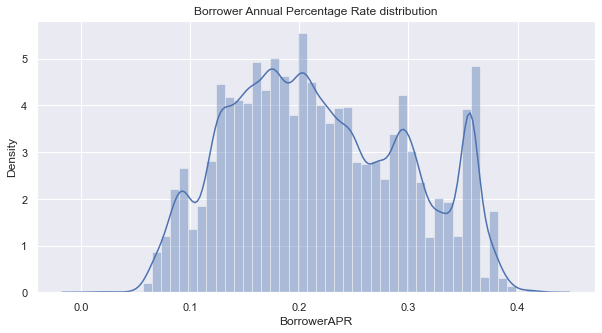

In [3]:
#Distribution of Borrower APR
plt.figure(figsize=(10,5))
sns.distplot(loan_data_sub.BorrowerAPR).set(title='Borrower Annual Percentage Rate distribution');

## What is the percentage distribution of loans by term?

>  We can observe that the loans to be paid in 36 months account for 76.58% of all loans followed by loans to be paid in 60 months at 21.98% and finally loans to be paid in a year at 1.45%. This shows that Prosper credit company majorly offers midterm loans as oppossed to short or longterm loans

36: 85523
60: 24545
12: 1614


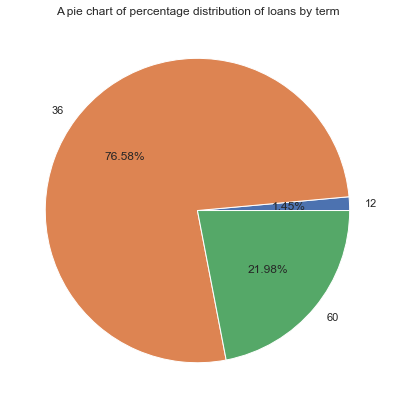

In [4]:
#grouping the data by terms
term_groups = loan_data_sub.groupby('Term')
#extracting unique terms from the Term feature
terms = loan_data_sub.Term.unique()
#dictionary of stats by term
stats = {}
for level in terms:
    print(f'{level}: {term_groups.get_group(level).shape[0]}')
    stats[level] = term_groups.get_group(level).shape[0]
# sorted by key, return a list of tuples
lists = sorted(stats.items()) 
# unpack a list of pairs into two tuples
x, y = zip(*lists) 
plt.figure(figsize=(10,7))
plt.pie(y, labels=x,autopct='%1.2f%%')
plt.title("A pie chart of percentage distribution of loans by term");

## How does the Loan amount affect the Borrowers Annual Rate Percentage?

> The higher the loan amount the lower the Borrowers Annual Percentage Rate.

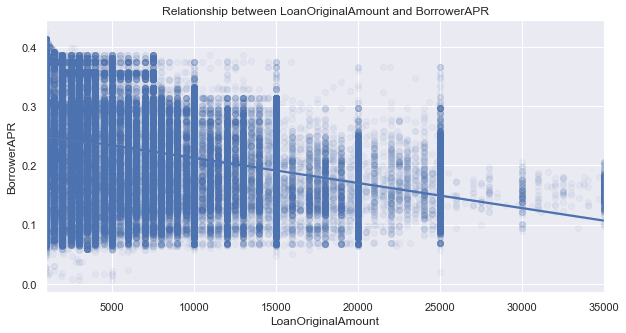

In [5]:
plt.figure(figsize=(10,5))
sns.regplot(data=loan_data_sub, x='LoanOriginalAmount', y='BorrowerAPR',  scatter_kws={'alpha':0.05}).set(
    title="Relationship between LoanOriginalAmount and BorrowerAPR");

## How does the loan term affect loan amount issue and the Borrower's Annual Percentage Rate?

> The 36-month term loans have borrowers annual percentage rate ranging from 0 to 0.45, 60-month term loans are concentrated more on the higher loan amounts and borrowers annual percentage rate between 0.1 and 0.35, and the 12-month loan term loans are dominantly for lower loan amounts with a borrowers annual percentage rate running between 0 and 0.35.

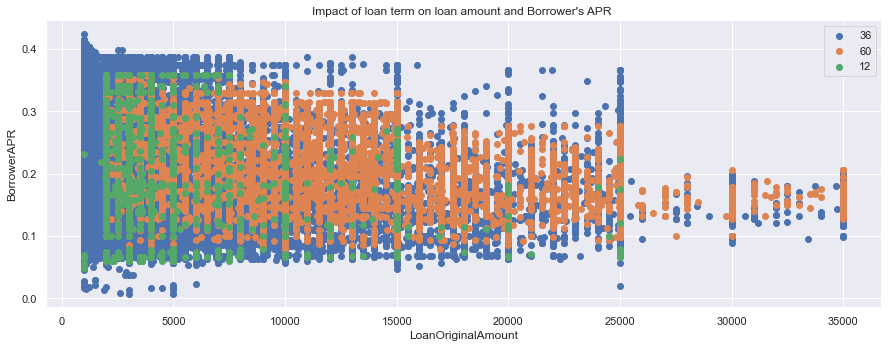

In [6]:
order=[36, 60, 12]
_ = sns.FacetGrid(data=loan_data_sub,hue ='Term',hue_order=order,size=5,aspect=2.5).set(
    title="Impact of loan term on loan amount and Borrower's APR ")
_.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR')
plt.legend();

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [7]:
!jupyter nbconvert Part_II_Prosper_Loan_SlideDeck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_Prosper_Loan_SlideDeck.ipynb to slides
[NbConvertApp] Writing 904106 bytes to Part_II_Prosper_Loan_SlideDeck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\ProgramData\Anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(not